In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.classical import expr   # allows classical logic on mid circuit measurement
def get_ghz_circ_dynamic(num_qubit):   
    if num_qubit%2==1:                                                  # For odd number of qubits
        qr=QuantumRegister(num_qubit)
        num_mid_measurements=int(num_qubit/2)
        cr1=ClassicalRegister(num_mid_measurements,name="cr1")          # mid circuit measurement
        cr2=ClassicalRegister(num_qubit,name="cr2")                     # final measurement
        qc=QuantumCircuit(qr,cr1,cr2)
        for i in range(num_mid_measurements+1):
            qc.h(2*i)
     
        for i in range(num_mid_measurements):
            qc.cx(2*i+2,2*i+1)
            qc.cx(2*i,2*i+1)
      
        for i in range(num_mid_measurements):
            qc.measure(2*i+1,cr1[i])
            if i==0:
                parity=expr.lift(cr1[i])
            else :
                parity=expr.bit_xor(cr1[i],parity)
            with qc.if_test(parity):
                    qc.x(2*i+2)
    
        for i in range(num_mid_measurements):
            parity=expr.lift(cr1[i])
            with qc.if_test(parity):
                qc.x(2*i+1)
            qc.cx(2*i,2*i+1)

    else:                                                               # For even number of Qubits
        qr=QuantumRegister(num_qubit)
        num_mid_measurements=int((num_qubit-1)/2)
        cr1=ClassicalRegister(num_mid_measurements,name="cr1")          # mid circuit measurement
        cr2=ClassicalRegister(num_qubit,name="cr2")                     # final measurement
        qc=QuantumCircuit(qr,cr1,cr2)
        for i in range(num_mid_measurements+1):
            qc.h(2*i)
        
        for i in range(num_mid_measurements):
            qc.cx(2*i+2,2*i+1)
            qc.cx(2*i,2*i+1)
        
        for i in range(num_mid_measurements):
            qc.measure(2*i+1,cr1[i])
            if i==0:
                parity=expr.lift(cr1[i])
            else :
                parity=expr.bit_xor(cr1[i],parity)
            with qc.if_test(parity):
                    qc.x(2*i+2)
    
        for i in range(num_mid_measurements):
            parity=expr.lift(cr1[i])
            with qc.if_test(parity):
                qc.x(2*i+1)
            qc.cx(2*i,2*i+1)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
  
    return qc


In [3]:
def get_ghz_circ_static(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        
    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    qc.barrier()
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    
    return qc
    
    

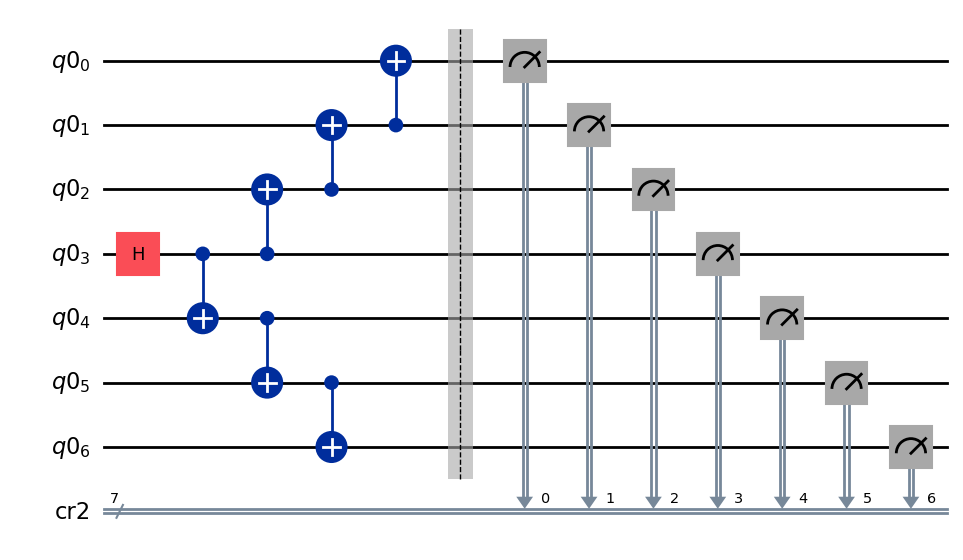

In [4]:
qc = get_ghz_circ_static(num_qubit=7)
qc.draw("mpl")

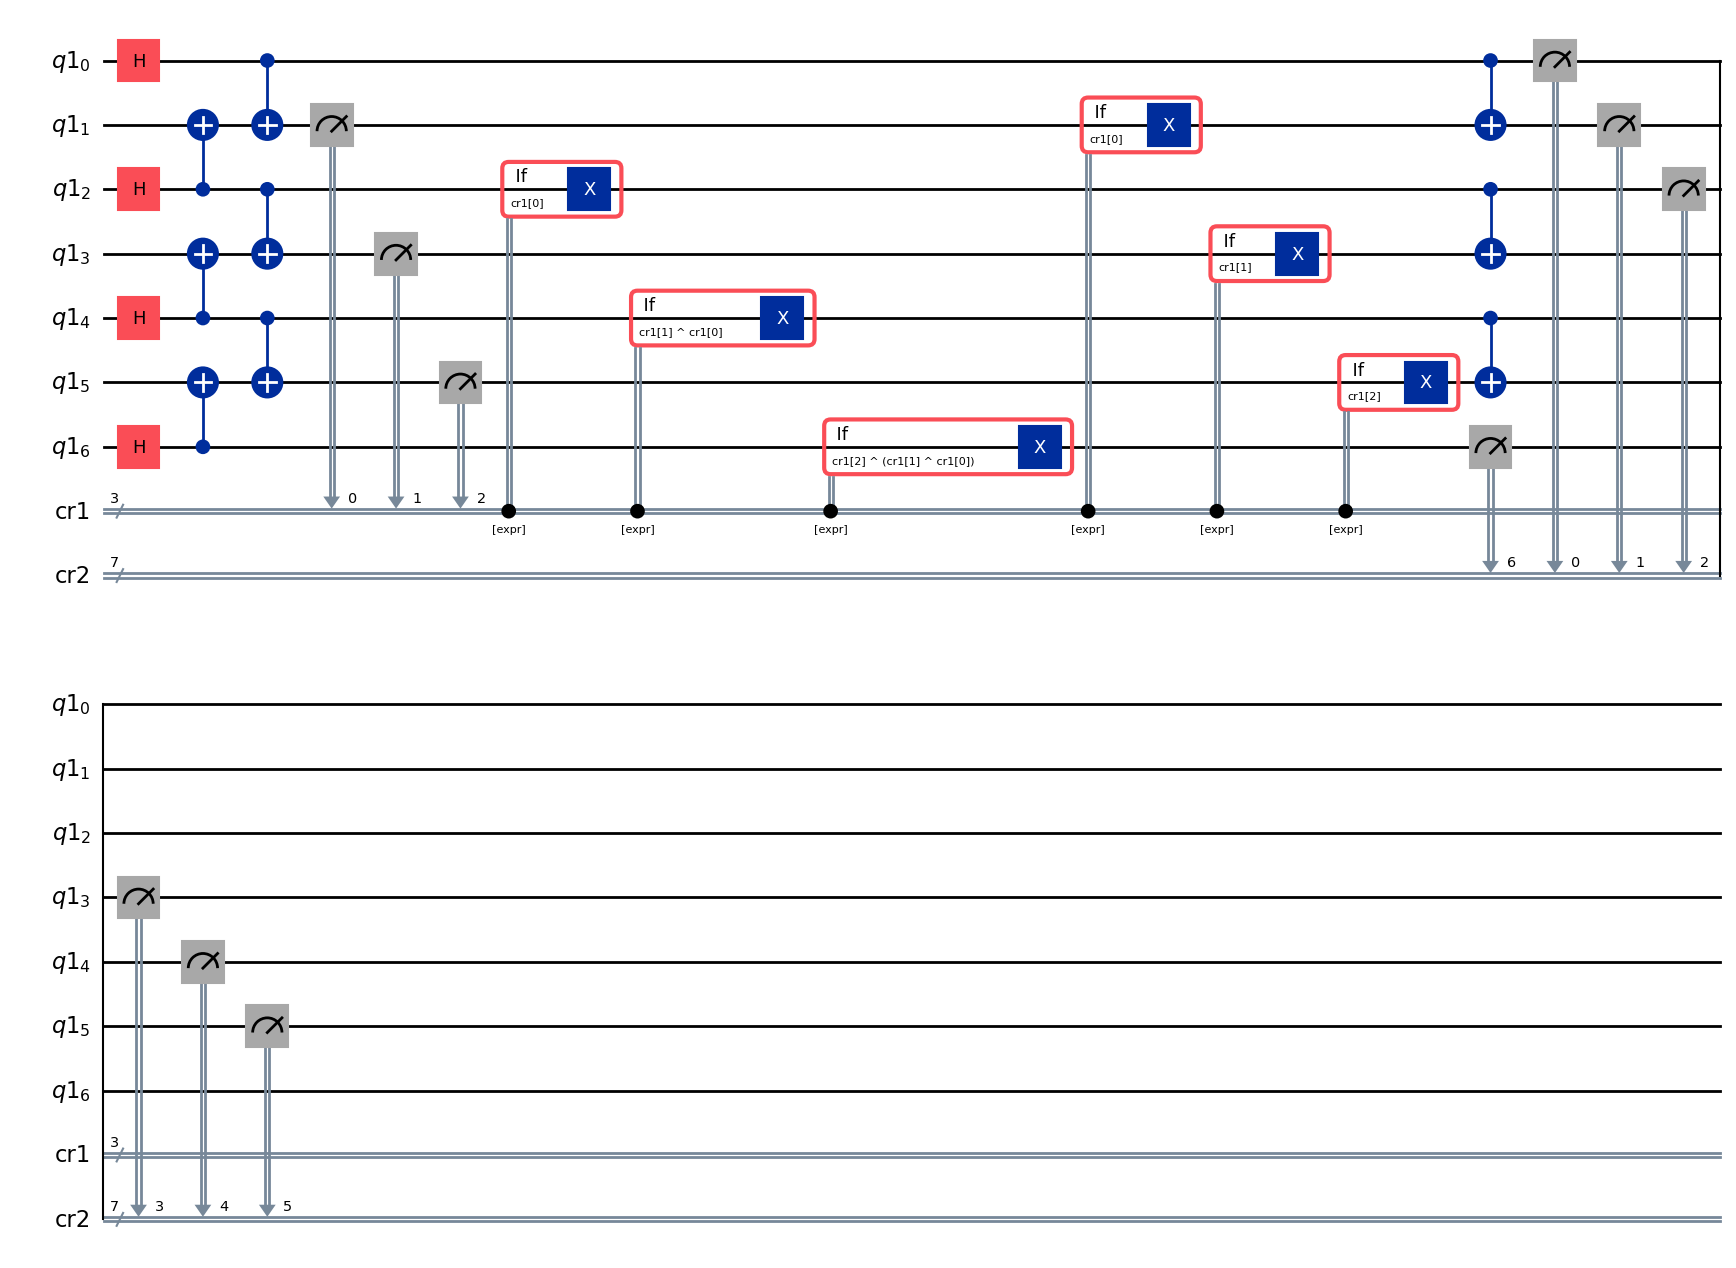

In [5]:
qc = get_ghz_circ_dynamic(num_qubit=7)
qc.draw("mpl")

In [6]:
#Creating list of circuits [Static1, Dynamic1, Static1, Dyanmic1,...,static2,dynamic2,staic2,dynamic2,...] i.e. some copies of each of them
min_qubit=9
max_num_qubit=10
copies=2
#qc_list_dynamic=[]
#qc_list_static=[]
#observables=[]
qc_list=[]
num_qubit_list=[]
for i in range(min_qubit,max_num_qubit+1):
    num_qubit_list.append(i)
for num_qubit in num_qubit_list:
    for i in range(copies):
        qc_list.append(get_ghz_circ_static(num_qubit))
        qc_list.append(get_ghz_circ_dynamic(num_qubit))

In [7]:
#Ideal Simulation with AerSimulator
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
 
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)

qc_transpiled_list_ideal = pm.run(qc_list)
sampler = Sampler(backend=aer_sim)
result_ideal = sampler.run(qc_transpiled_list_ideal).result()

In [18]:
print(result_ideal)

PrimitiveResult([PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>))), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>))), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>))), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>)))], metadata={})


In [8]:
# For getting list of ideal counts (argument required for Fidelity)
counts_list_ideal=[]
for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_ideal[(2*i*copies)+(2*j)].data    
        data_dynamic = result_ideal[(2*i*copies)+((2*j)+1)].data 
       
        print(data_static)
        print(data_dynamic)
        
        counts_static=data_static.cr2.get_counts()
        counts_dynamic=data_dynamic.cr2.get_counts()
        
        counts_list_ideal.append(counts_static)
        counts_list_ideal.append(counts_dynamic)
   

DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>))


In [9]:
# trasnpilation
# Creating list of transpiled circuits having 1 no of resets to 10 no of resets (10 copies of each circuit)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
service=QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)
pm=generate_preset_pass_manager(optimization_level=1,backend=backend)
qc_transpiled_list=pm.run(qc_list)

In [10]:
# Execution
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler=Sampler(backend=backend)
job=sampler.run(qc_transpiled_list,shots=1024)
print(job.job_id())

csr0dqyea560008g9h3g


In [11]:
# post processing
import matplotlib.pyplot as plt
import statistics
from qiskit_ibm_runtime import QiskitRuntimeService
job_id='csr0dqyea560008g9h3g'
service=QiskitRuntimeService()
job=service.job(job_id)
result_real=job.result()

In [17]:
print(result_real)

PrimitiveResult([PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>)), metadata={'circuit_metadata': {}}), PubRes

In [12]:
# For getting list of ideal counts (argument required for Fidelity)
counts_list_real=[]
for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_real[(2*i*copies)+(2*j)].data    
        data_dynamic = result_real[(2*i*copies)+((2*j)+1)].data 
       
        print(data_static)
        print(data_dynamic)
        
        counts_static=data_static.cr2.get_counts()
        counts_dynamic=data_dynamic.cr2.get_counts()
        
        counts_list_real.append(counts_static)
        counts_list_real.append(counts_dynamic)

DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=9>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>))
DataBin<>(cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>))
DataBin<>(cr1=BitArray(<shape=(), num_shots=1024, num_bits=4>), cr2=BitArray(<shape=(), num_shots=1024, num_bits=10>))


In [14]:
#Calculation of lists of Fidelity mean and std deviation of real hardware experiment
import statistics
from qiskit.quantum_info.analysis import hellinger_fidelity
# We will create 4 lists of Fidelities, for storing mean, std deviation of Fidelity, of copies of a circuit for fixed no of logical qubits


Fidelity_mean_static_osaka=[]
Fidelity_mean_dynamic_osaka=[]

Fidelity_std_static_osaka=[]
Fidelity_std_dynamic_osaka=[]

Fidelity_copies_static_osaka=[]
Fidelity_copies_dynamic_osaka=[]


for i in range(len(num_qubit_list)):
    
    for j in range(copies):
        
     
  

        Fidelity_static= hellinger_fidelity(counts_list_ideal[(2*i*copies)+(2*j)], counts_list_real[(2*i*copies)+(2*j)])
        Fidelity_dynamic=hellinger_fidelity(counts_list_ideal[(2*i*copies)+((2*j)+1)], counts_list_real[(2*i*copies)+((2*j)+1)])

        Fidelity_copies_static_osaka.append(Fidelity_static)
        Fidelity_copies_dynamic_osaka.append(Fidelity_dynamic)



    Fidelity_mean_static_osaka.append(statistics.mean(Fidelity_copies_static_osaka))
    Fidelity_mean_dynamic_osaka.append(statistics.mean(Fidelity_copies_dynamic_osaka))
    
    Fidelity_std_static_osaka.append(statistics.stdev(Fidelity_copies_static_osaka))
    Fidelity_std_dynamic_osaka.append(statistics.stdev(Fidelity_copies_dynamic_osaka))
   
    Fidelity_copies_static_osaka.clear()
    Fidelity_copies_dynamic_osaka.clear()


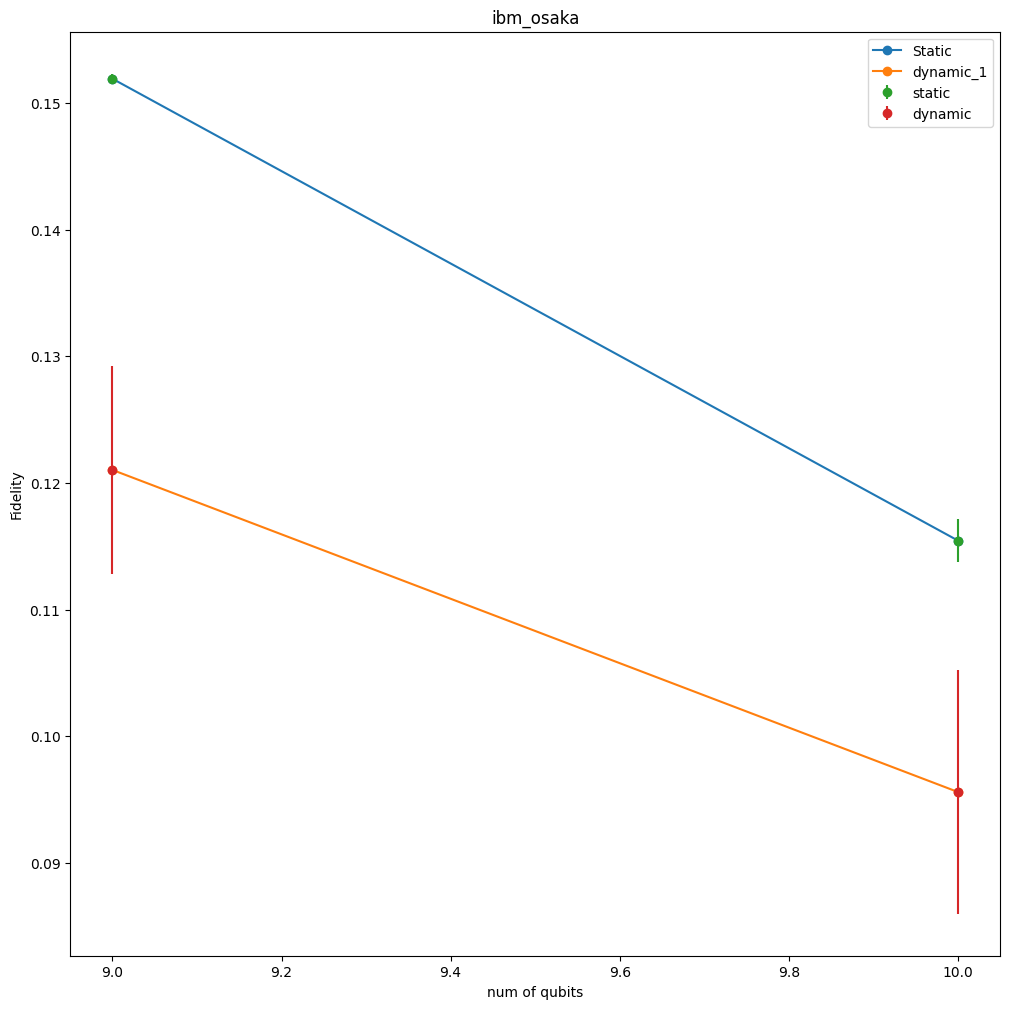

In [16]:
# Graph plotting
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
#figure(figsize=(16,12), dpi=180)
fig, ax3 = plt.subplots(1, 1, figsize=(12,12))

# Create  data.


ax3.set_xlabel('num of qubits')
ax3.set_ylabel('Fidelity')
ax3.set_title('ibm_osaka')
x3 = num_qubit_list
y3_static = Fidelity_mean_static_osaka
y3_dynamic = Fidelity_mean_dynamic_osaka
y_error_static =Fidelity_std_static_osaka
y_error_dynamic =Fidelity_std_dynamic_osaka
ax3.plot(x3, y3_static, 'o-',label='Static')
ax3.plot(x3, y3_dynamic, 'o-',label='dynamic_1')
ax3.errorbar(x3, y3_static,
			yerr = y_error_static, label='static',
			fmt ='o')
ax3.errorbar(x3, y3_dynamic,
			yerr = y_error_dynamic, label='dynamic',
			fmt ='o')


plt.legend()
plt.show()